In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import jview
import cellpose
import transforms_plantseg as T

import torch


2022-02-11 17:13:42,115 [INFO] WRITING LOG OUTPUT TO /home/ottosson/.cellpose/run.log


In [2]:
def modulereload(modulename):
    import importlib        
    importlib.reload(modulename)

In [3]:
modulereload(T)

In [4]:
with open('/scratch/ottosson/investigation/cellpose/src/notebooks/raw_batch.npy', 'rb') as f:
    raw = torch.from_numpy(np.load(f))
with open('/scratch/ottosson/investigation/cellpose/src/notebooks/target_batch.npy', 'rb') as f:
    target = np.load(f)

print(raw.shape)
print(target.shape)

torch.Size([8, 2, 224, 224])
(8, 3, 224, 224)


In [5]:
phase_config = {
  'label': [ {'name': 'Unit'}],
  'raw':[ {'name': 'MotionBlur', 'execution_probability': 1.0}]
}

In [6]:
# Get transform
## Get min max ... values
minval = 0
maxval = 2
meanval =0.5
stdval = 0.2
t = T.get_transformer(phase_config,minval, maxval, meanval, stdval)
raw_transform = t.raw_transform()
label_transform = t.label_transform()

In [7]:
t_raw = raw_transform(raw.clone())
t_target = label_transform(target.copy())

In [8]:
jview.describe(raw,'raw')
#jview.describe(label,'label')
jview.describe(t_raw,'Transofrmed raw')
#jview.describe(t_label,'Transformed label')

raw
	dtype: torch.float32
	shape: torch.Size([8, 2, 224, 224])
	min: 0.0
	mean: 0.06283045560121536
	max: 2.5024099349975586
Transofrmed raw
	dtype: torch.float32
	shape: torch.Size([8, 2, 224, 224])
	min: 0.0
	mean: 0.06282276660203934
	max: 1.663565993309021


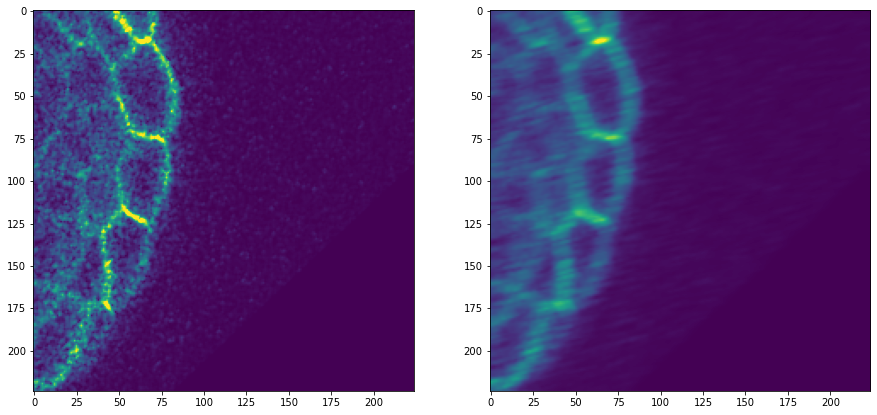

In [9]:
fig, axs = plt.subplots(1,2)
#axs[0].imshow(raw[z_slice])
batch_index=3
axs[0].imshow(raw[batch_index][0], vmin=0, vmax = 1.5)
axs[1].imshow(t_raw[batch_index][0], vmin=0, vmax = 1.5)
fig.set_size_inches(15,7)


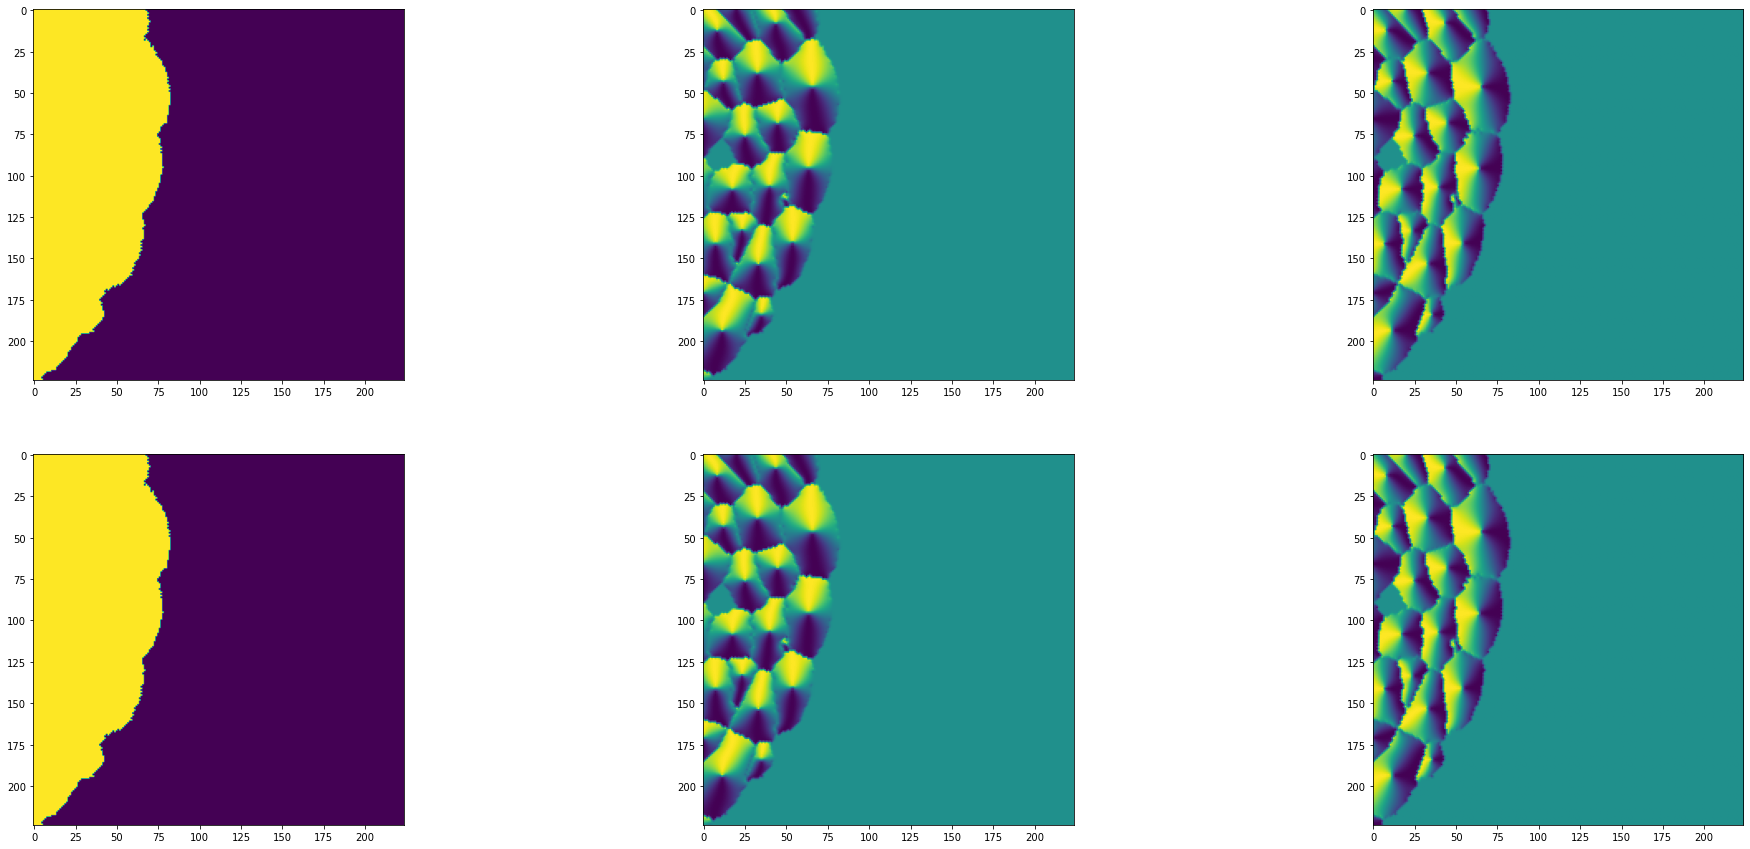

In [10]:
fig,axs = plt.subplots(2,3)
batch_index = 3
axs[0,0].imshow(target[batch_index][0])
axs[0,1].imshow(target[batch_index][1],vmin=-1, vmax = 1)
axs[0,2].imshow(target[batch_index][2],vmin=-1, vmax = 1)
axs[1,0].imshow(t_target[batch_index][0])
axs[1,1].imshow(t_target[batch_index][1],vmin=-1, vmax = 1)
axs[1,2].imshow(t_target[batch_index][2],vmin=-1, vmax = 1)
fig.set_size_inches(34,15)

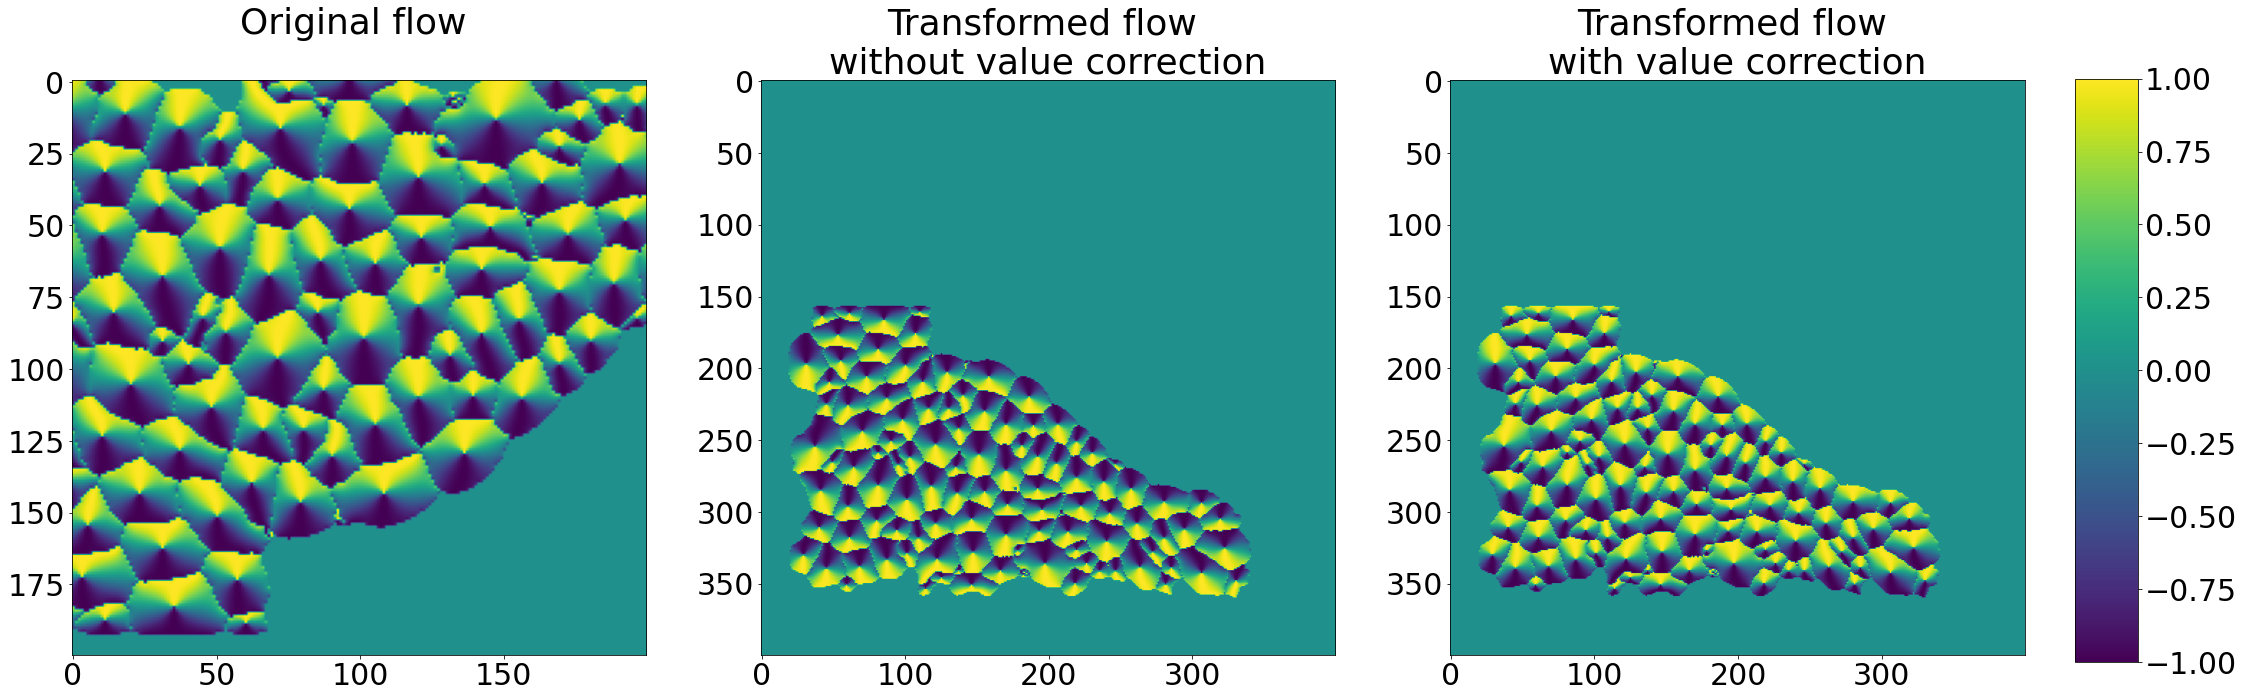

In [93]:
fig, axs = plt.subplots(1,3,gridspec_kw={'width_ratios': [6,6,6]})
axs[0].imshow(label[2][50:250, 50:250],vmin=-1, vmax = 1)
axs[1].imshow(-t_label[2],vmin=-1, vmax = 1)
im2 = axs[2].imshow(t_label[2],vmin=-1, vmax = 1)
fig.set_size_inches(35,15)
plt.rcParams.update({'font.size': 30})

axs[0].set_title("Original flow \n")
axs[1].set_title("Transformed flow \nwithout value correction")
axs[2].set_title("Transformed flow \nwith value correction")
cax = plt.axes([0.92, 0.230, 0.025, 0.54])
fig.colorbar(im2,cax=cax)

In [103]:
import torchvision.transforms

In [105]:
torchvision.transforms.InterpolationMode.BILINEAR


<InterpolationMode.BILINEAR: 'bilinear'>

In [76]:
batch_index = 6
im = raw
Rim = TF.rotate(im, angle=45 ,expand = True, fill = 0.5)
BRim = raw_transform(Rim.clone())
RBRim = TF.rotate(BRim, angle=-45 ,expand = False)
CRBRim = TF.center_crop(RBRim, (224,224))


3
9
8
8
4
9
7
8


In [77]:
print("IM shape ", im.shape)
print("RIM shape ", Rim.shape)
print("BRIM shape ", BRim.shape)
print("RBRIM shape ", RBRim.shape)
print("CRBRIM shape ", CRBRim.shape)

IM shape  torch.Size([8, 2, 224, 224])
RIM shape  torch.Size([8, 2, 318, 318])
BRIM shape  torch.Size([8, 2, 318, 318])
RBRIM shape  torch.Size([8, 2, 318, 318])
CRBRIM shape  torch.Size([8, 2, 224, 224])


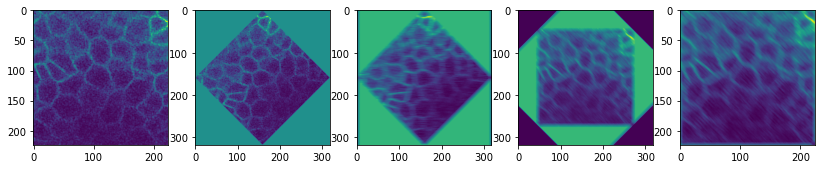

In [78]:
fig, axs = plt.subplots(1,5)
batch_index = 6
axs[0].imshow(im[batch_index][0])
axs[1].imshow(Rim[batch_index][0])
axs[2].imshow(BRim[batch_index][0])
axs[3].imshow(RBRim[batch_index][0])
axs[4].imshow(CRBRim[batch_index][0])
fig.set_size_inches(14,8)

tensor(21.1184)